### Q.4. Build a model to recognize different handwritten digits from MNIST dataset by using multinomial logistic regression. Use of Adam optimization algorithm to learn model with parameters for α = 0.01, epoch = 40000 and random parameters of the model and Loss function: Softmax loss function. 
### (a) Plot the cost function vs epoch 
### (b) Predict the digit of your designed model on random test data enter by you 
### (c) print confusion matrix 
### (d) calculate classification metrics such as precision, recall, f1-score and accuracy


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split 
from activations import sigmoid, d_sigmoid 

plt.style.use("ggplot")
%matplotlib inline

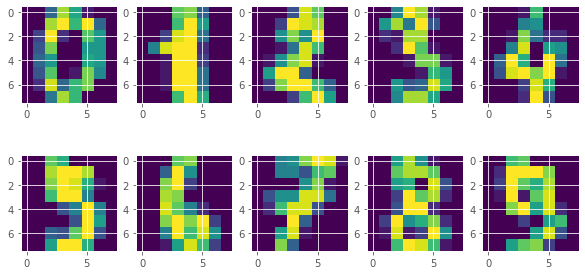

In [2]:
digits = load_digits()
fig, ax = plt.subplots(2,5, figsize = (10, 5))
ax[0,0].imshow(digits.images[0])
ax[0,1].imshow(digits.images[1])
ax[0,2].imshow(digits.images[2])
ax[0,3].imshow(digits.images[3])
ax[0,4].imshow(digits.images[4])
ax[1,0].imshow(digits.images[5])
ax[1,1].imshow(digits.images[6])
ax[1,2].imshow(digits.images[7])
ax[1,3].imshow(digits.images[8])
ax[1,4].imshow(digits.images[9])
plt.show();

In [3]:
lr = 0.01 
epochs = 400 
coi = 0 

In [5]:
class LogisticRegression():
    
    def set_values(self, initial_params, alpha=0.01, max_iter=5000, class_of_interest=0):
        self.params = initial_params
        self.alpha = alpha
        self.max_iter = max_iter
        self.class_of_interest = class_of_interest
    
    @staticmethod
    def _sigmoid(x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def predict(self, x_bar, params):
                
        return self._sigmoid(np.dot(params, x_bar))
    
    def _compute_cost(self, input_var, output_var, params):
        
        cost = 0
        for x, y in zip(input_var, output_var):
            x_bar = np.array(np.insert(x, 0, 1))
            y_hat = self.predict(x_bar, params)
            
            y_binary = 1.0 if y == self.class_of_interest else 0.0
            cost += y_binary * np.log(y_hat) + (1.0 - y_binary) * np.log(1 - y_hat)
            
        return cost
    
    def train(self, input_var, label, print_iter = 5000):
        
        iteration = 1
        while iteration < self.max_iter:
            if iteration % print_iter == 0:
                print(f'iteration: {iteration}')
                print(f'cost: {self._compute_cost(input_var, label, self.params)}')
            
            for i, xy in enumerate(zip(input_var, label)):
                x_bar = np.array(np.insert(xy[0], 0, 1))
                y_hat = self.predict(x_bar, self.params)
                
                y_binary = 1.0 if xy[1] == self.class_of_interest else 0.0
                gradient = (y_binary - y_hat) * x_bar
                self.params += self.alpha * gradient
            
            iteration +=1
        
        return self.params

    def test(self, input_test, label_test):
        self.total_classifications = 0
        self.correct_classifications = 0
        
        for x,y in zip(input_test, label_test):
            self.total_classifications += 1
            x_bar = np.array(np.insert(x, 0, 1))
            y_hat = self.predict(x_bar, self.params)
            y_binary = 1.0 if y == self.class_of_interest else 0.0
            
            if y_hat >= 0.5 and  y_binary == 1:
                self.correct_classifications += 1
              
            if y_hat < 0.5 and  y_binary != 1:
                self.correct_classifications += 1
                
        self.accuracy = self.correct_classifications / self.total_classifications
            
        return self.accuracy
        

In [6]:
digits_train, digits_test, digits_label_train, digits_label_test =train_test_split(digits.data, digits.target, test_size=0.20)

In [7]:
alpha = 1e-2
params_0 = np.zeros(len(digits.data[0]) + 1)

max_iter = 1000
digits_regression_model_0 = LogisticRegression()
digits_regression_model_0.set_values(params_0, alpha, max_iter, 0)

params =\
digits_regression_model_0.train(digits_train / 16.0, digits_label_train, 10)

iteration: 10
cost: -44.02578796646939
iteration: 20
cost: -27.843257975591246
iteration: 30
cost: -21.61306910530169
iteration: 40
cost: -18.118582350558945
iteration: 50
cost: -15.818245622362344
iteration: 60
cost: -14.16094076771981
iteration: 70
cost: -12.89527156691522
iteration: 80
cost: -11.888435529131975
iteration: 90
cost: -11.062960738569775
iteration: 100
cost: -10.37028112232654
iteration: 110
cost: -9.778238006844884
iteration: 120
cost: -9.264598181099917
iteration: 130
cost: -8.813443888788973
iteration: 140
cost: -8.413044544220067
iteration: 150
cost: -8.054542194373843
iteration: 160
cost: -7.731107435260282
iteration: 170
cost: -7.437379270093531
iteration: 180
cost: -7.169082725721175
iteration: 190
cost: -6.922761315347813
iteration: 200
cost: -6.695585766382879
iteration: 210
cost: -6.48521463071972
iteration: 220
cost: -6.2896909541524115
iteration: 230
cost: -6.107364491754523
iteration: 240
cost: -5.9368323355073604
iteration: 250
cost: -5.776893020948293
ite

In [8]:
digits_accuracy = digits_regression_model_0.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a Zero digit in test set: {digits_accuracy}')

Accuracy of prediciting a Zero digit in test set: 1.0


In [9]:
alpha = 1e-2
params_0 = np.zeros(len(digits.data[1]) + 1)

max_iter = 1000
digits_regression_model_1 = LogisticRegression()
digits_regression_model_1.set_values(params_0, alpha, max_iter, 1)

params =\
digits_regression_model_1.train(digits_train / 16.0, digits_label_train, 10)

iteration: 10
cost: -137.47039238994458
iteration: 20
cost: -110.62154241561814
iteration: 30
cost: -97.9918678103909
iteration: 40
cost: -89.90825933865038
iteration: 50
cost: -84.04975907996041
iteration: 60
cost: -79.50458380836388
iteration: 70
cost: -75.82068618845892
iteration: 80
cost: -72.74152533956506
iteration: 90
cost: -70.10813076905711
iteration: 100
cost: -67.81565704939948
iteration: 110
cost: -65.79161651754737
iteration: 120
cost: -63.98398402626421
iteration: 130
cost: -62.35426021531798
iteration: 140
cost: -60.873215543859416
iteration: 150
cost: -59.51816913011662
iteration: 160
cost: -58.27118787102738
iteration: 170
cost: -57.11785897507739
iteration: 180
cost: -56.04643166001979
iteration: 190
cost: -55.047203358839
iteration: 200
cost: -54.11207196052322
iteration: 210
cost: -53.23420332333168
iteration: 220
cost: -52.40778042046118
iteration: 230
cost: -51.62781133637682
iteration: 240
cost: -50.88998038066678
iteration: 250
cost: -50.19053125928178
iteration

In [10]:
digits_accuracy = digits_regression_model_1.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a One digit in test set: {digits_accuracy}')

Accuracy of prediciting a One digit in test set: 0.9805555555555555
